# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14,13.83,5.740000e+12,5,Urban
1,South Michelleport,2019-03-04,30.24,2.340000e+12,72,Urban
2,Port Samanthamouth,2019-02-24,33.44,2.010000e+12,57,Urban
3,Rodneyfort,2019-02-10,23.44,5.150000e+12,34,Urban
4,South Jack,2019-03-06,34.58,3.910000e+12,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29,13.38,8.550000e+12,6,Rural
2371,Lake Latoyabury,2019-01-30,20.76,9.020000e+12,2,Rural
2372,North Jaime,2019-02-10,11.11,2.780000e+12,1,Rural
2373,West Heather,2019-05-07,44.94,4.260000e+12,4,Rural


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
city_data_df["type"].unique()

urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]

suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]

rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]


total_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]



total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [4]:
# 2. Get the total drivers for each city type

total_drivers = pyber_data_df.groupby(['type', 'city'])['driver_count'].mean().reset_index().groupby('type').sum()['driver_count'].astype(int)

                                                                             
#suburban_driver_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]

#rural_driver_df = pyber_data_df[pyber_data_df["type"] == "Rural"]




total_drivers 



type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int32

In [5]:
#  3. Get the total amount of fares for each city type

urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"].count()["fare"]

suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"].count()["fare"]

rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"].count()["fare"]

total_fares = pyber_data_df.groupby(["type"]).sum()["fare"]

total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [6]:
#  4. Get the average fare per ride for each city type. 
avg_fare_ride = total_fares / total_rides

avg_fare_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [7]:
#suburabn_avg_fare = pyber_data_df.groupby(["type"]).mean()["fare"]

#suburabn_avg_fare

In [8]:
#urban_avg_fare = pyber_data_df.groupby(["type"]).mean()["fare"]
#urban_avg_fare

In [9]:
#rural_avg_fare = pyber_data_df.groupby(["type"]).mean()["fare"]
#rural_avg_fare

In [10]:
# 5. Get the average fare per driver for each city type. 

#urban_avg_driver = pyber_data_dff.groupby(["type"]).mean()["fare"]
#suburabn_avg_driver = pyber_data_df.groupby(["type"]).mean()["fare"]
#rural_avg_driver = pyber_data_df.groupby(["type"]).mean()["fare"]

avg_fare_driver = total_fares / total_drivers  

avg_fare_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [11]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df= pd.concat([total_rides, total_drivers, total_fares, avg_fare_ride, avg_fare_driver], 
                axis =1, keys=['Total Rides', 'Total Drivers', 'Total Fares', 'Average Fare Per Ride', 'Average Fare Per Driver']) 

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [12]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [13]:
#  8. Format the columns.

pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)

pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)

pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)

pyber_summary_df["Average Fare Per Ride"] = pyber_summary_df["Average Fare Per Ride"].map("${:,.2f}".format)

pyber_summary_df["Average Fare Per Driver"] = pyber_summary_df["Average Fare Per Driver"].map("${:,.2f}".format)

# Display the data frame
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [14]:
# 1. Read the merged DataFrame
pyber_data_df




,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14,13.83,5.740000e+12,5,Urban
1,South Michelleport,2019-03-04,30.24,2.340000e+12,72,Urban
2,Port Samanthamouth,2019-02-24,33.44,2.010000e+12,57,Urban
3,Rodneyfort,2019-02-10,23.44,5.150000e+12,34,Urban
4,South Jack,2019-03-06,34.58,3.910000e+12,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29,13.38,8.550000e+12,6,Rural
2371,Lake Latoyabury,2019-01-30,20.76,9.020000e+12,2,Rural
2372,North Jaime,2019-02-10,11.11,2.780000e+12,1,Rural
2373,West Heather,2019-05-07,44.94,4.260000e+12,4,Rural


In [15]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
pyber_df = pyber_data_df.groupby(["type", "date"]).sum()[["fare"]]


pyber_df

fare
type  date              
Rural 2019-01-01   43.69
      2019-01-02   52.12
      2019-01-03   19.90
      2019-01-04   24.88
      2019-01-06   47.33
...                  ...
Urban 2019-05-04  323.57
      2019-05-05  322.10
      2019-05-06  181.20
      2019-05-07  258.01
      2019-05-08  170.82

[334 rows x 1 columns]

In [16]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.

new_pyber_df = pyber_df.reset_index()





new_pyber_df

,type,date,fare
0,Rural,2019-01-01,43.69
1,Rural,2019-01-02,52.12
2,Rural,2019-01-03,19.90
3,Rural,2019-01-04,24.88
4,Rural,2019-01-06,47.33
...,...,...,...
329,Urban,2019-05-04,323.57
330,Urban,2019-05-05,322.10
331,Urban,2019-05-06,181.20
332,Urban,2019-05-07,258.01


In [17]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

new_pyber_pivot_df = new_pyber_df.pivot(index='date', columns='type', values='fare')
new_pyber_pivot_df

type,Rural,Suburban,Urban
date,,,
2019-01-01,43.69,128.52,127.78
2019-01-02,52.12,274.92,305.99
2019-01-03,19.90,133.48,260.48
2019-01-04,24.88,20.69,258.14
2019-01-05,NaN,101.36,506.89
...,...,...,...
2019-05-04,NaN,91.71,323.57
2019-05-05,26.53,154.78,322.10
2019-05-06,111.88,34.12,181.20


In [18]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
new_pyber_pivot_loc_df = new_pyber_pivot_df.loc['2019-01-01' : '2019-04-29']
new_pyber_pivot_loc_df

type,Rural,Suburban,Urban
date,,,
2019-01-01,43.69,128.52,127.78
2019-01-02,52.12,274.92,305.99
2019-01-03,19.90,133.48,260.48
2019-01-04,24.88,20.69,258.14
2019-01-05,NaN,101.36,506.89
...,...,...,...
2019-04-25,55.84,155.98,419.81
2019-04-26,NaN,132.45,330.98
2019-04-27,52.34,268.25,367.30


In [19]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
new_pyber_pivot_loc_df.index = pd.to_datetime(new_pyber_pivot_loc_df.index)

In [20]:
# 7. Check that the datatype for the index is datetime using df.info()
new_pyber_pivot_loc_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119 entries, 2019-01-01 to 2019-04-29
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     74 non-null     float64
 1   Suburban  118 non-null    float64
 2   Urban     119 non-null    float64
dtypes: float64(3)
memory usage: 3.7 KB


In [21]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
new_pyber_week_df = new_pyber_pivot_loc_df.resample("w").sum()

new_pyber_week_df.head(5)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94


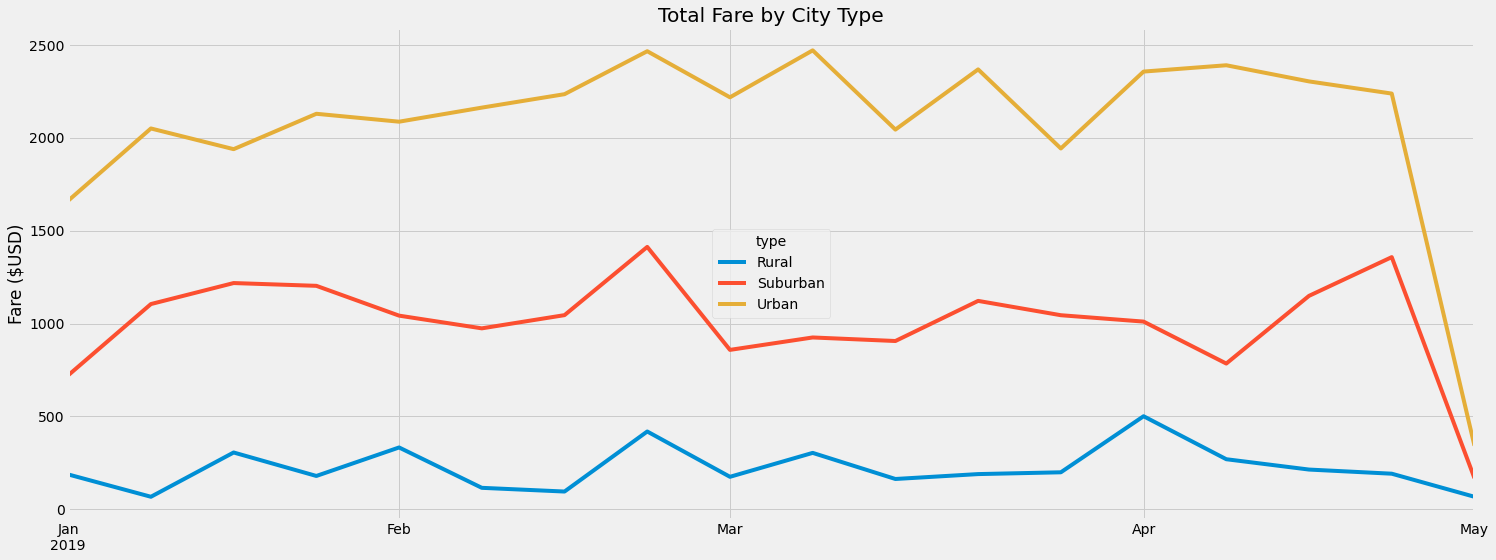

In [23]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
pyber_plot = new_pyber_week_df.plot(figsize=(21, 8))
pyber_plot.set_xlabel("")
pyber_plot.set_ylabel("Fare ($USD)")
pyber_plot.set_title("Total Fare by City Type")


# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

plt.savefig("analysis/PyBer_fare_summary.png")

pyber_plot.legend(title='type', loc= 'center')

plt.tight_layout()
